In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.1 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.utils import plot_model
import shap
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Adding a channel dimension to the images
train_images, test_images = np.expand_dims(a=train_images, axis=-1) / 255.0, np.expand_dims(a=test_images, axis=-1) / 255.0

# Obtaining possible labels from the dataset
labels = np.unique(ar=test_labels)

# Converting labels to categoricals
train_labels, test_labels = tf.keras.utils.to_categorical(y=train_labels), tf.keras.utils.to_categorical(y=test_labels)


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def create_model():
    # Input layer
    input_layer = Input(shape=(28, 28, 1))

    # First Conv2D + MaxPool2D block
    x = Conv2D(filters=16,
               kernel_size=(3, 3),
               activation="relu",
               padding="same")(input_layer)
    x = MaxPool2D(pool_size=(2, 2))(x)

    # Second Conv2D + MaxPool2D block
    x = Conv2D(filters=32,
               kernel_size=(3, 3),
               activation="relu",
               padding="same")(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    # Third Conv2D + MaxPool2D block
    x = Conv2D(filters=64,
               kernel_size=(3, 3),
               activation="relu",
               padding="same")(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    # Global Average Pooling and Dense output layers
    x = GlobalAveragePooling2D()(x)
    output_layer = Dense(units=10,
                         activation="softmax")(x)

    # Returning the model
    return Model(inputs=input_layer,
                 outputs=output_layer)

In [6]:
# Creating the model
model = create_model()

# Compiling the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Training the model
history = model.fit(x=train_images, y=train_labels,
                    batch_size=128,
                    epochs=5,
                    validation_data=(test_images, test_labels))
model.save(filepath="model.h5")

Epoch 1/5
469/469 [==============================] - 63s 133ms/step - loss: 0.6643 - accuracy: 0.7983 - val_loss: 0.2409 - val_accuracy: 0.9327
Epoch 2/5
469/469 [==============================] - 58s 123ms/step - loss: 0.2155 - accuracy: 0.9367 - val_loss: 0.1847 - val_accuracy: 0.9462
Epoch 3/5
469/469 [==============================] - 47s 101ms/step - loss: 0.1582 - accuracy: 0.9534 - val_loss: 0.1307 - val_accuracy: 0.9611
Epoch 4/5
469/469 [==============================] - 49s 105ms/step - loss: 0.1274 - accuracy: 0.9613 - val_loss: 0.0946 - val_accuracy: 0.9729
Epoch 5/5
469/469 [==============================] - 44s 94ms/step - loss: 0.1098 - accuracy: 0.9663 - val_loss: 0.0912 - val_accuracy: 0.9713


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [7]:
# Creating a list for image indices
indices = []

# Obtaining the index of the first image of each label
for label in labels:
    label_index = np.where(np.argmax(a=test_labels, axis=1)==label)[0][0]
    indices.append(label_index)

imgs_to_explain = test_images[indices]

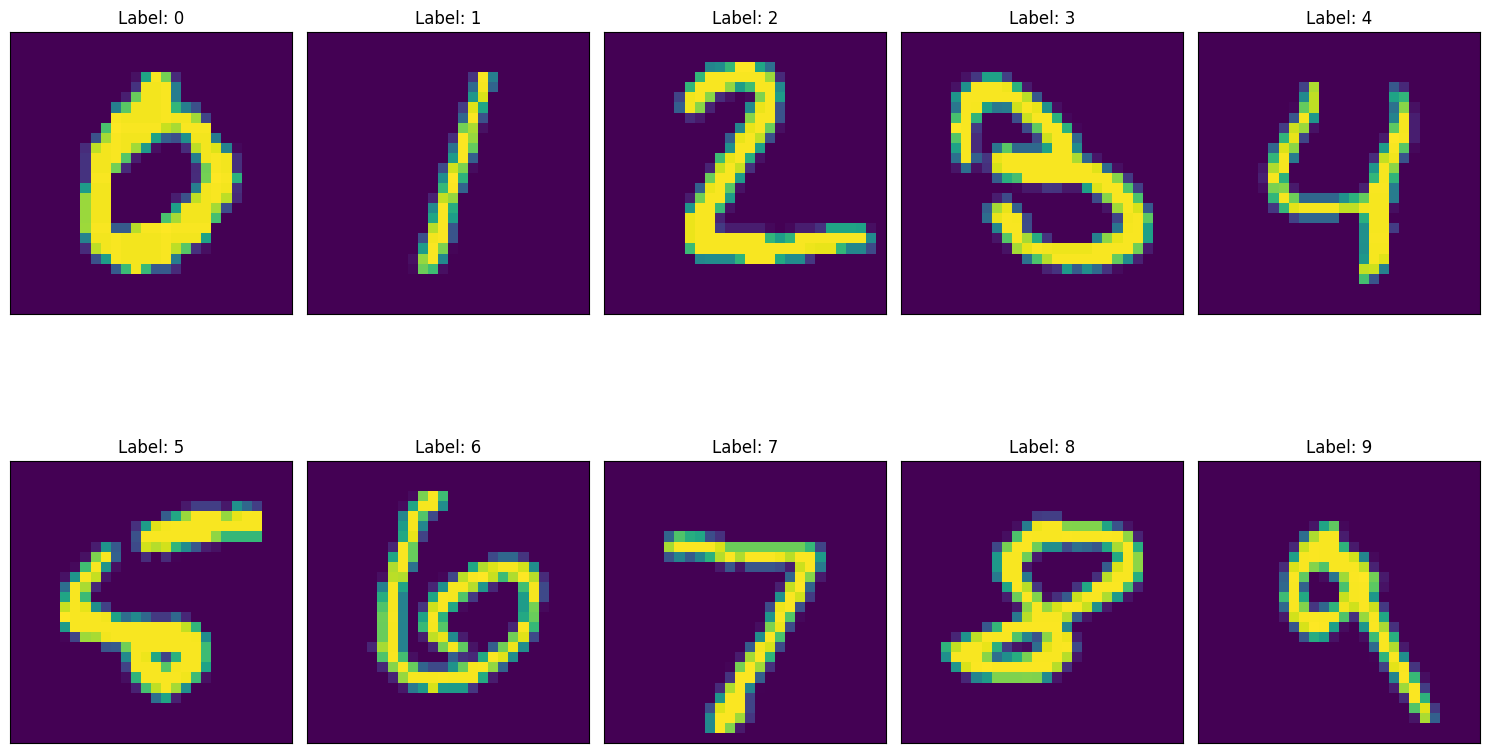

In [8]:
# Confirming that the indices are correct
# Creating a figure
plt.figure(figsize=(15, 10))

# Setting the number of rows and columns
rows, cols = 2, 5

# Iterating over the total number of spots in the figure
for i in range(rows * cols):
    # Creating a subplot
    plt.subplot(rows, cols, i + 1)

    # Showing current image
    plt.imshow(X=test_images[indices[i]])

    # Showing label corresponding to image
    plt.title(label=f"Label: {np.argmax(test_labels[indices[i]])}")

    # Hiding x and y ticks
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])

# Using space available in the figure efficiently
plt.tight_layout()

# Showing the plot
plt.show()

In [9]:
# Creating an image masker
masker = shap.maskers.Image(mask_value="blur(128, 128)",
                            shape=test_images[0].shape)

# Creating an explainer object
explainer = shap.Explainer(model=model.predict,
                           masker=masker,
                           algorithm="auto",
                           output_names=labels.astype(str))

1/1 [==============================] - 0s 25ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


PartitionExplainer explainer:  10%|█         | 1/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


PartitionExplainer explainer:  30%|███       | 3/10 [00:20<00:28,  4.12s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


PartitionExplainer explainer:  40%|████      | 4/10 [00:29<00:37,  6.18s/it]

1/1 [==============================] - 0s 61ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  50%|█████     | 5/10 [00:40<00:41,  8.21s/it]

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  60%|██████    | 6/10 [00:54<00:40, 10.15s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


PartitionExplainer explainer:  70%|███████   | 7/10 [01:02<00:28,  9.40s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer:  80%|████████  | 8/10 [01:11<00:18,  9.34s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


PartitionExplainer explainer:  90%|█████████ | 9/10 [01:20<00:09,  9.17s/it]

1/1 [==============================] - 0s 31ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer: 100%|██████████| 10/10 [01:30<00:00,  9.36s/it]

1/1 [==============================] - 0s 34ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


PartitionExplainer explainer: 11it [01:39,  9.95s/it]


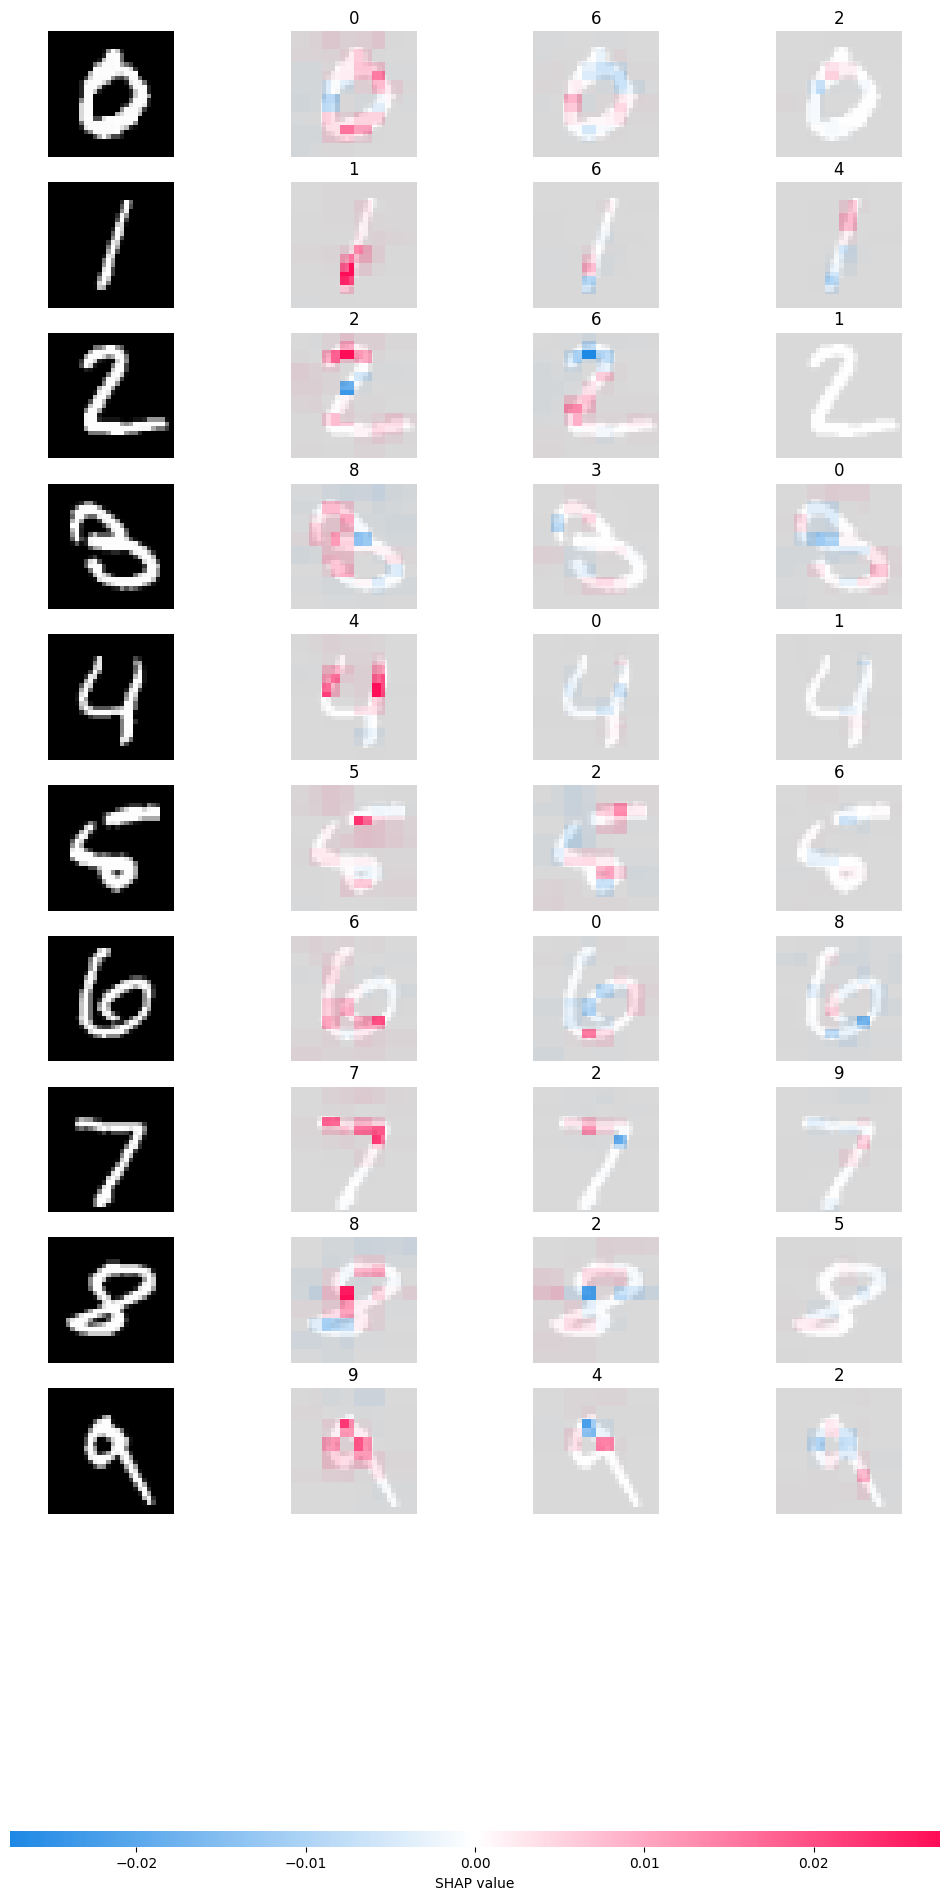

In [10]:
# Function for calculating and plotting SHAP values
def plot_shap_values(imgs_to_explain, max_evals):
    # Calculating shap values for our images
    shap_values = explainer(imgs_to_explain,
                            max_evals=max_evals,
                            outputs=shap.Explanation.argsort.flip[:3])

    # Plotting shap values
    shap.image_plot(shap_values=shap_values,
                    show=False)

# Plotting SHAP values
plot_shap_values(imgs_to_explain=imgs_to_explain,
                 max_evals=1000)

1/1 [==============================] - 0s 22ms/step


PartitionExplainer explainer: 11it [00:10, 10.76s/it]                


1/1 [==============================] - 0s 30ms/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  20%|██        | 2/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


PartitionExplainer explainer:  40%|████      | 4/10 [00:14<00:12,  2.04s/it]

1/1 [==============================] - 0s 23ms/step


PartitionExplainer explainer:  50%|█████     | 5/10 [00:18<00:14,  2.91s/it]

1/1 [==============================] - 0s 25ms/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


PartitionExplainer explainer:  60%|██████    | 6/10 [00:23<00:15,  3.86s/it]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  70%|███████   | 7/10 [00:28<00:11,  3.98s/it]

1/1 [==============================] - 0s 23ms/step


PartitionExplainer explainer:  80%|████████  | 8/10 [00:32<00:08,  4.03s/it]

1/1 [==============================] - 0s 41ms/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer:  90%|█████████ | 9/10 [00:37<00:04,  4.53s/it]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer: 100%|██████████| 10/10 [00:42<00:00,  4.41s/it]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/498 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


PartitionExplainer explainer: 11it [00:47,  5.29s/it]


1/1 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 48ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


PartitionExplainer explainer:  20%|██        | 2/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


PartitionExplainer explainer:  40%|████      | 4/10 [00:27<00:24,  4.16s/it]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


PartitionExplainer explainer:  50%|█████     | 5/10 [00:37<00:31,  6.25s/it]

1/1 [==============================] - 0s 35ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


PartitionExplainer explainer:  60%|██████    | 6/10 [00:46<00:29,  7.38s/it]

1/1 [==============================] - 0s 22ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


PartitionExplainer explainer:  70%|███████   | 7/10 [00:54<00:22,  7.63s/it]

1/1 [==============================] - 0s 36ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


PartitionExplainer explainer:  80%|████████  | 8/10 [01:03<00:16,  8.20s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


PartitionExplainer explainer:  90%|█████████ | 9/10 [01:12<00:08,  8.47s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer: 100%|██████████| 10/10 [01:21<00:00,  8.45s/it]

1/1 [==============================] - 0s 44ms/step


  0%|          | 0/998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


PartitionExplainer explainer: 11it [01:30, 10.08s/it]


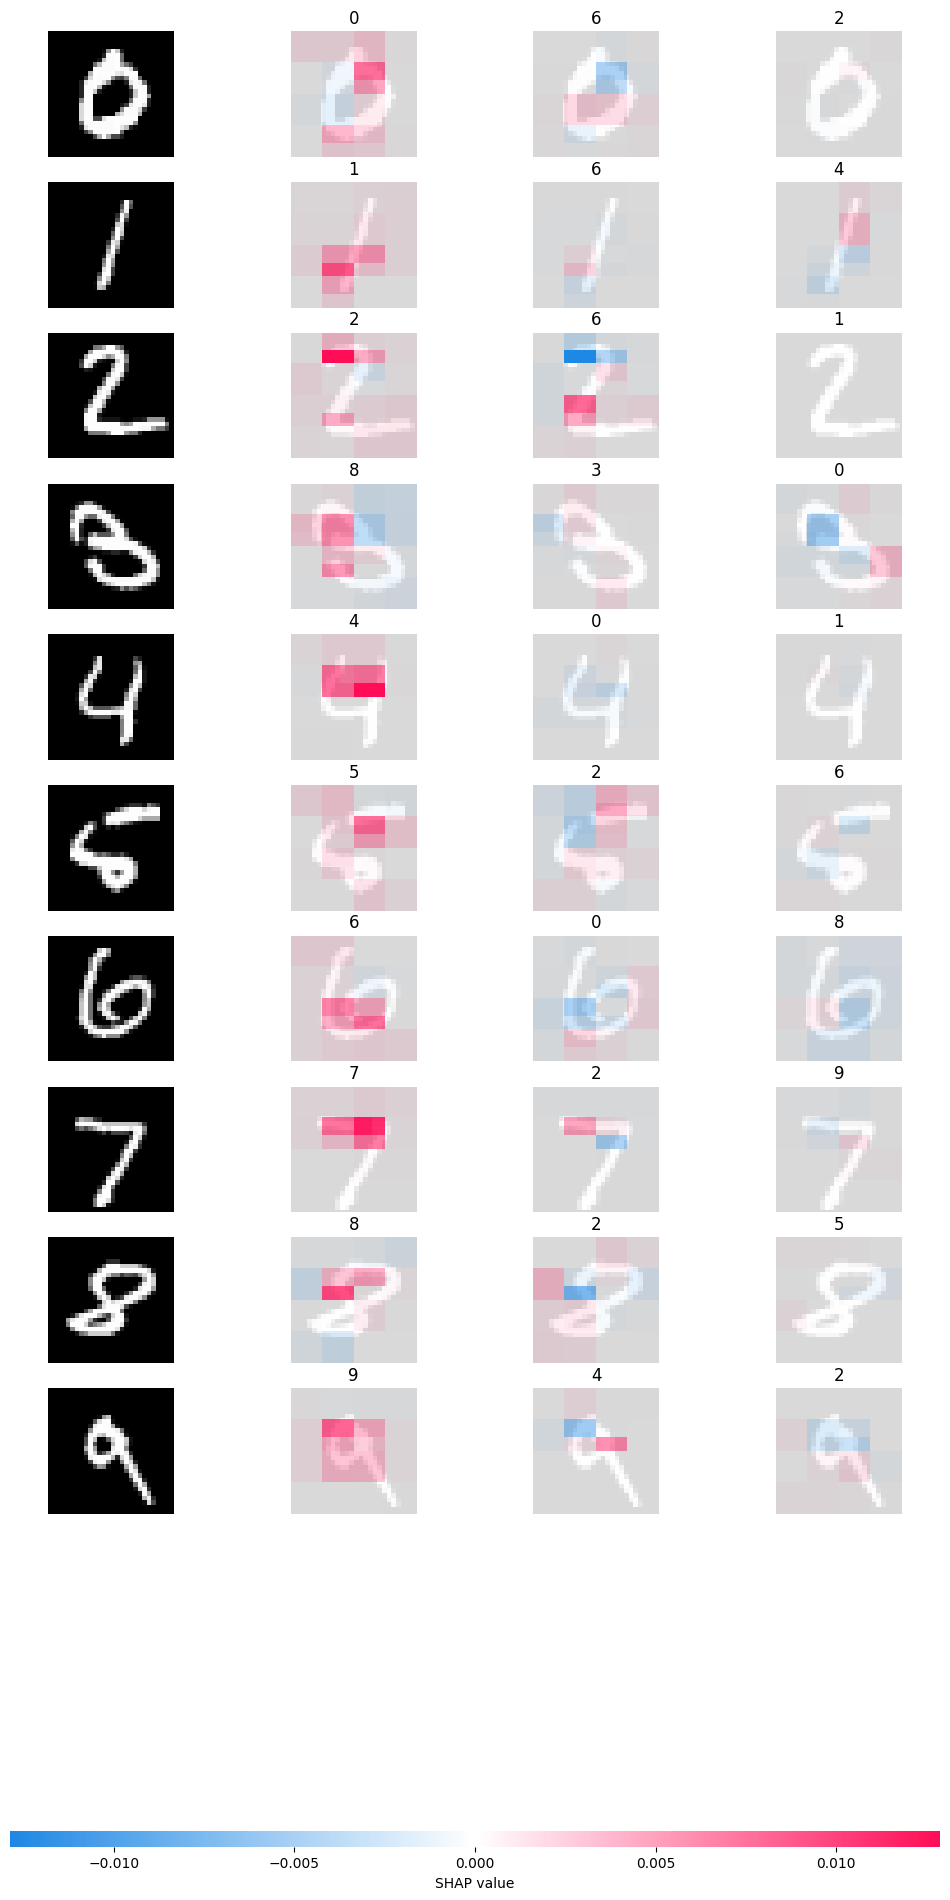

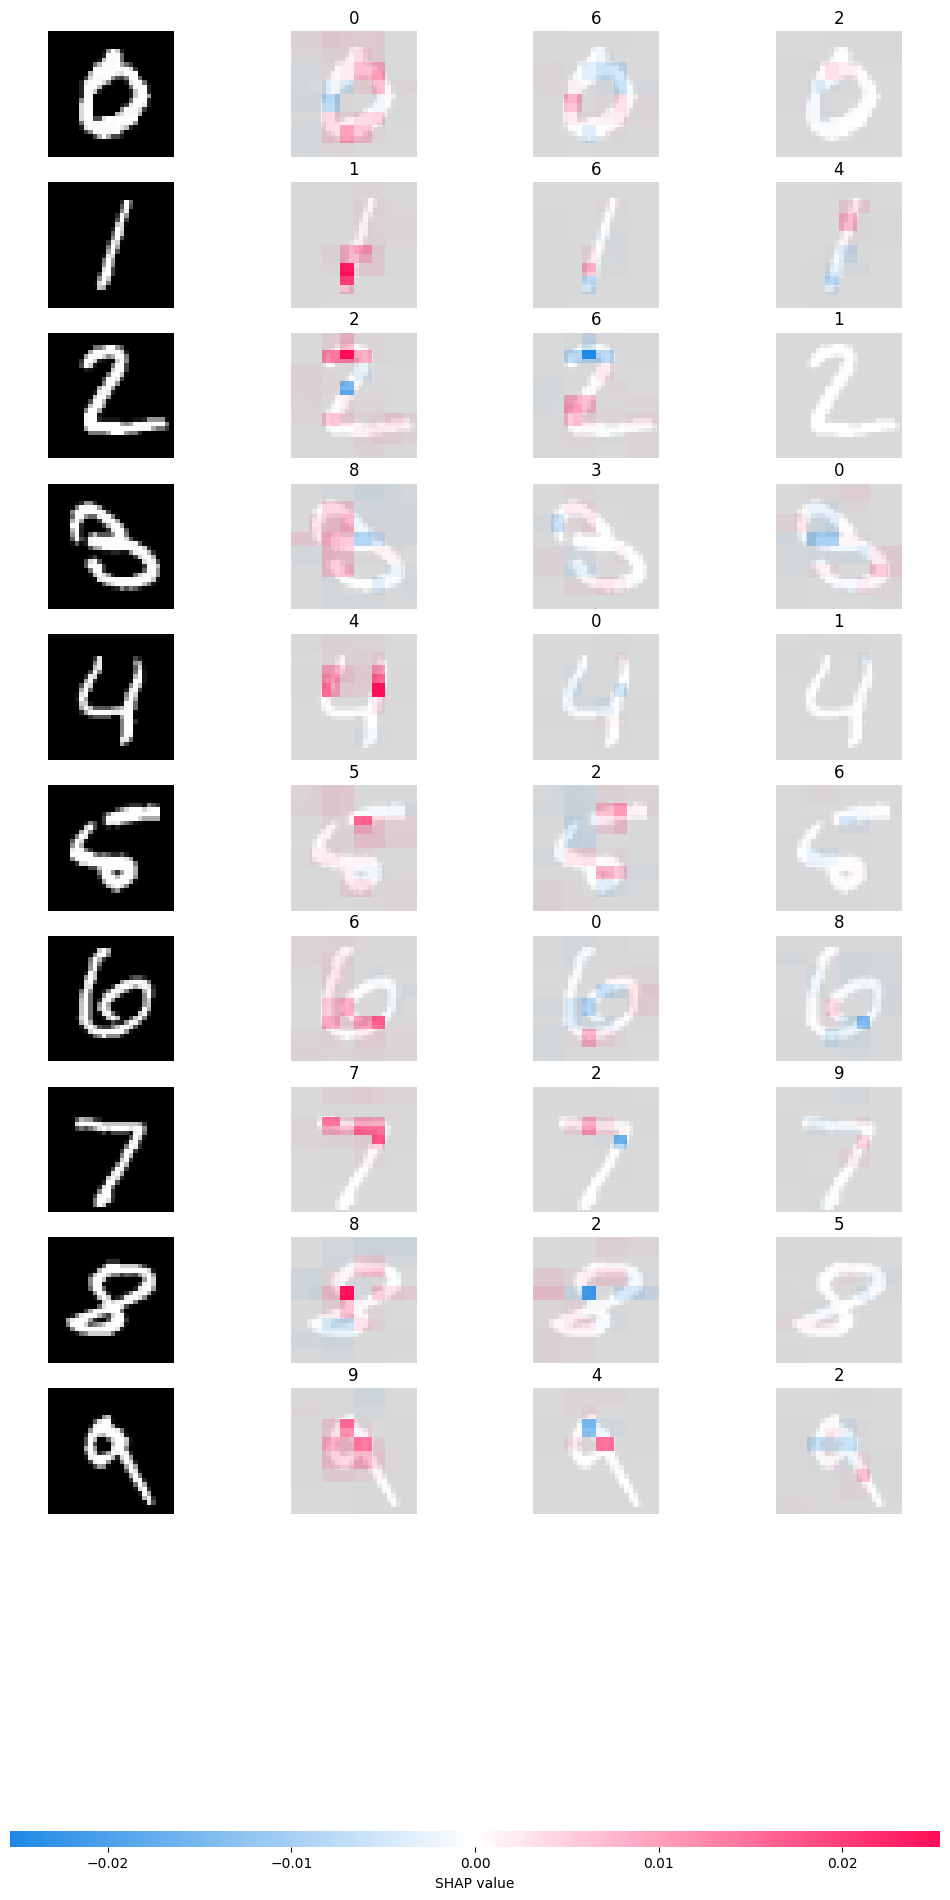

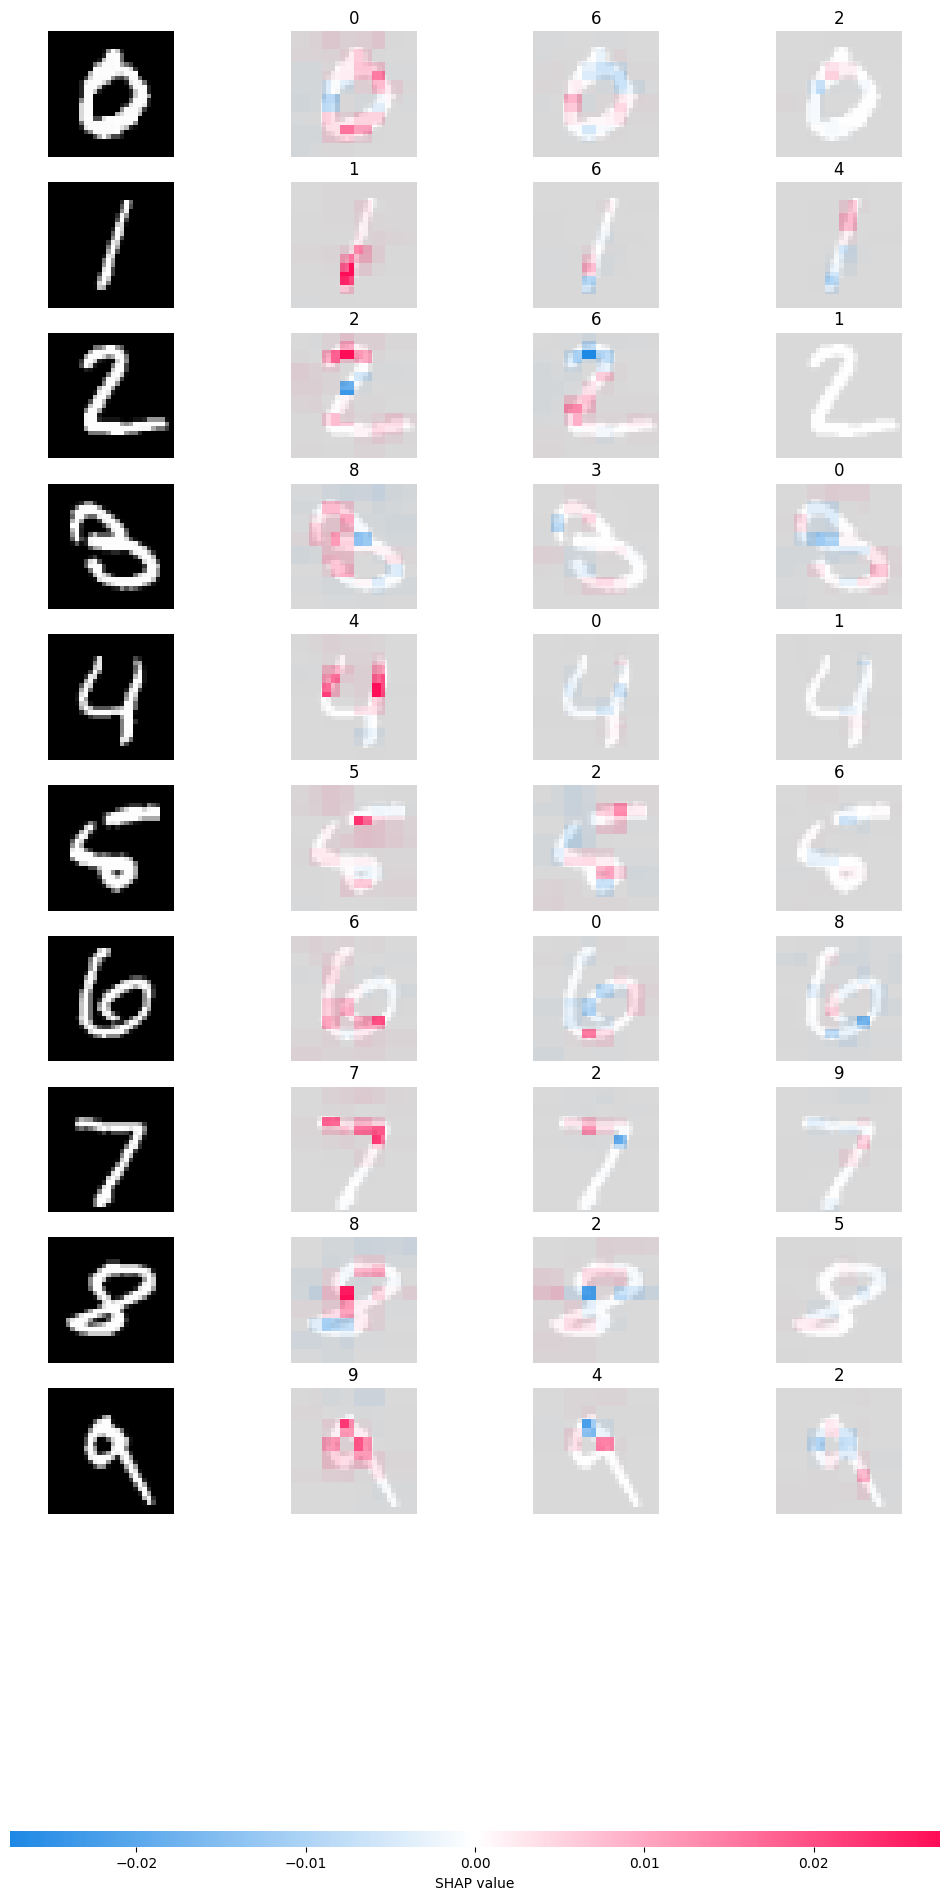

In [11]:
# Choosing max evaluations to try
max_evals = [100, 500, 1000]

# Iterating over eval values
for max_eval in max_evals:
    # Plotting SHAP values
    plot_shap_values(imgs_to_explain=imgs_to_explain,
                     max_evals=max_eval)

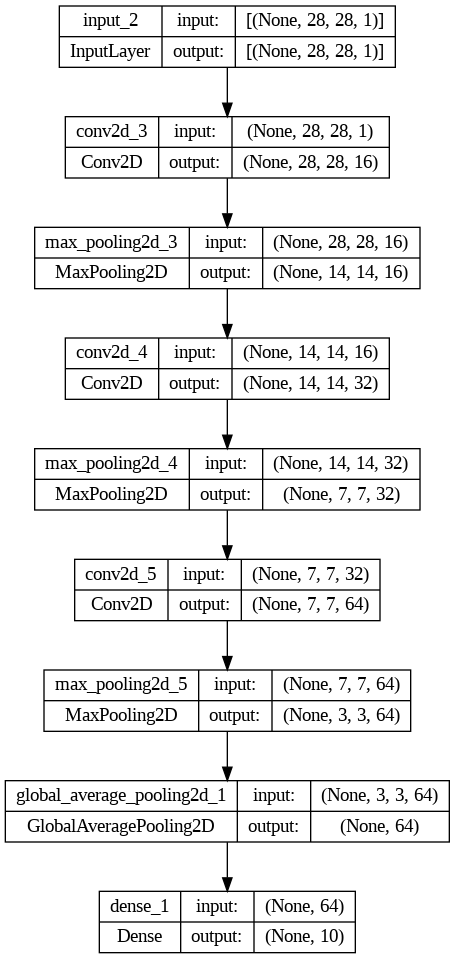

In [12]:
# Plotting the model
plot_model(model=model,
           show_shapes=True)

In [13]:
# Creating a model that would produce processed images of necessary shape
model_input = Model(inputs=model.layers[0].input,
                    outputs=model.layers[2].output)

# Creating a model that has the layer that we are interested in as input
model_output = Model(inputs=model.layers[3].input,
                     outputs=model.layers[-1].output)

In [14]:
# Function for calculating and plotting SHAP values with GradientExplainer
def calculcate_plot_gradient_explainer(model_input,
                                       model_output,
                                       test_images,
                                       imgs_to_explain):

    # Creating a GradientExplainer object
    gradient_explainer = shap.GradientExplainer(model=model_output,
                                                data=model_input.predict(test_images))

    # Obtaining SHAP values and the indexes for model outputs
    shap_values, indexes = gradient_explainer.shap_values(X=model_input.predict(imgs_to_explain),
                                                          ranked_outputs=3)

    # Plotting SHAP values
    shap.image_plot(shap_values=shap_values,
                    pixel_values=imgs_to_explain,
                    labels=indexes)

1/1 [==============================] - 0s 39ms/step


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


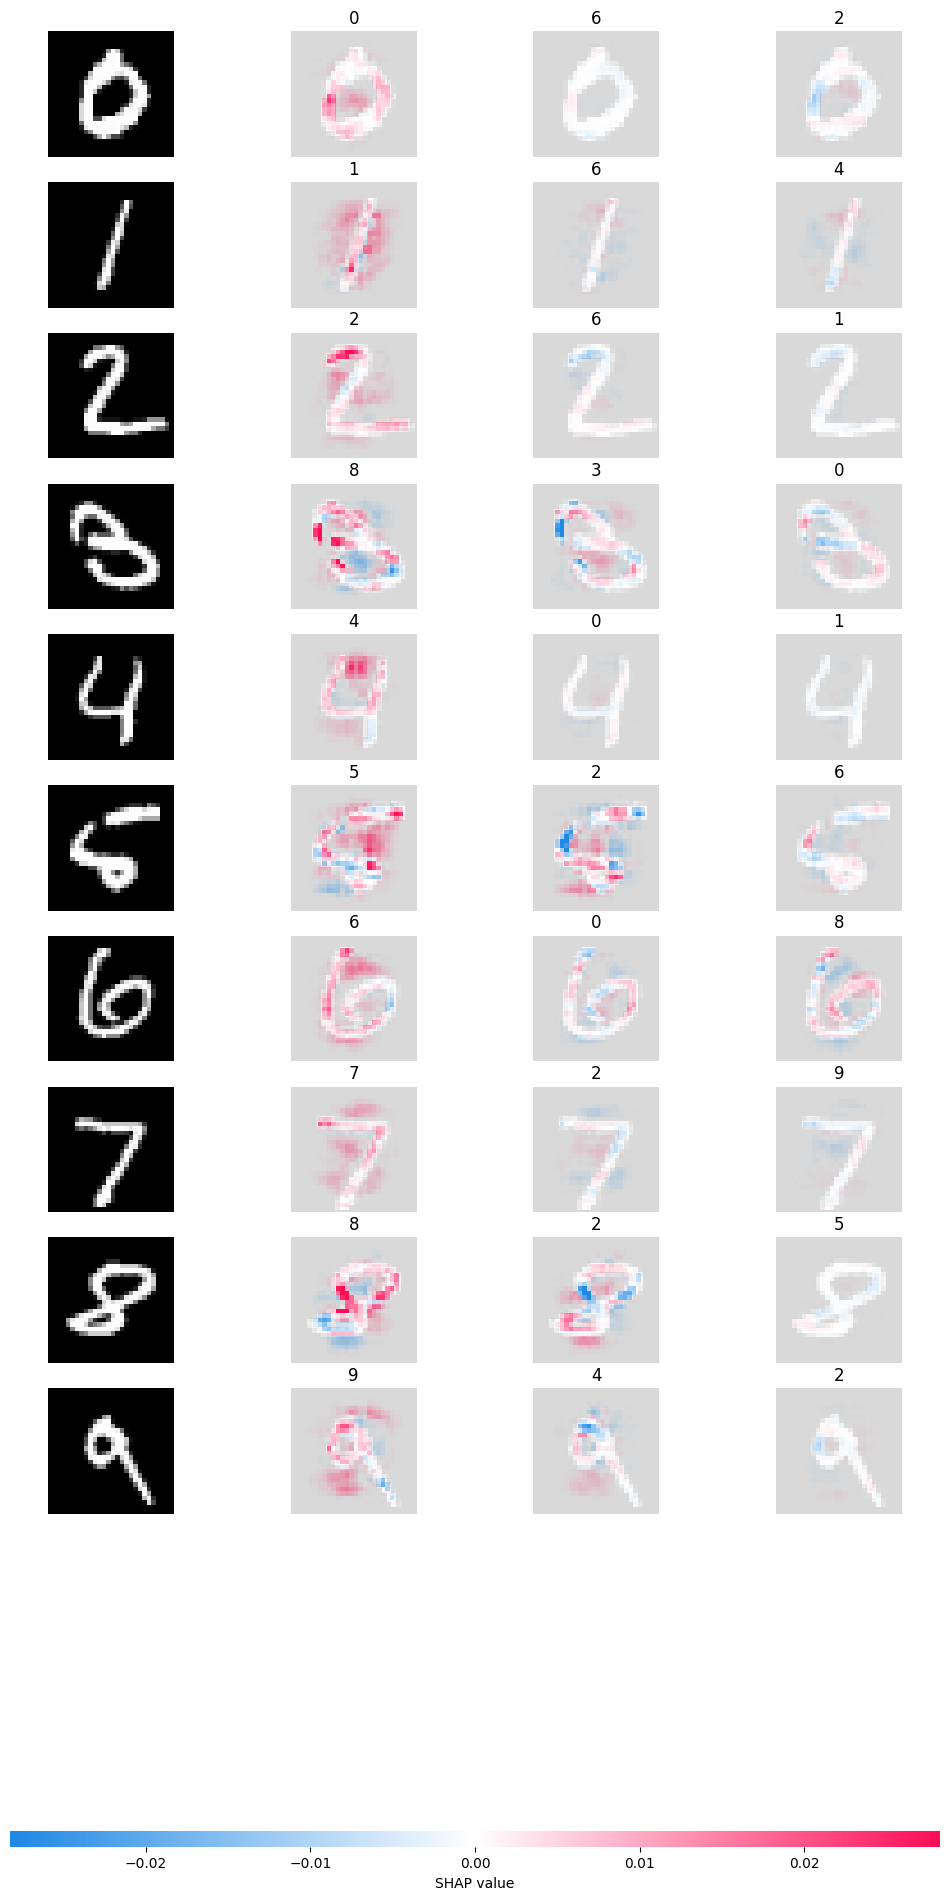

1/1 [==============================] - 0s 23ms/step


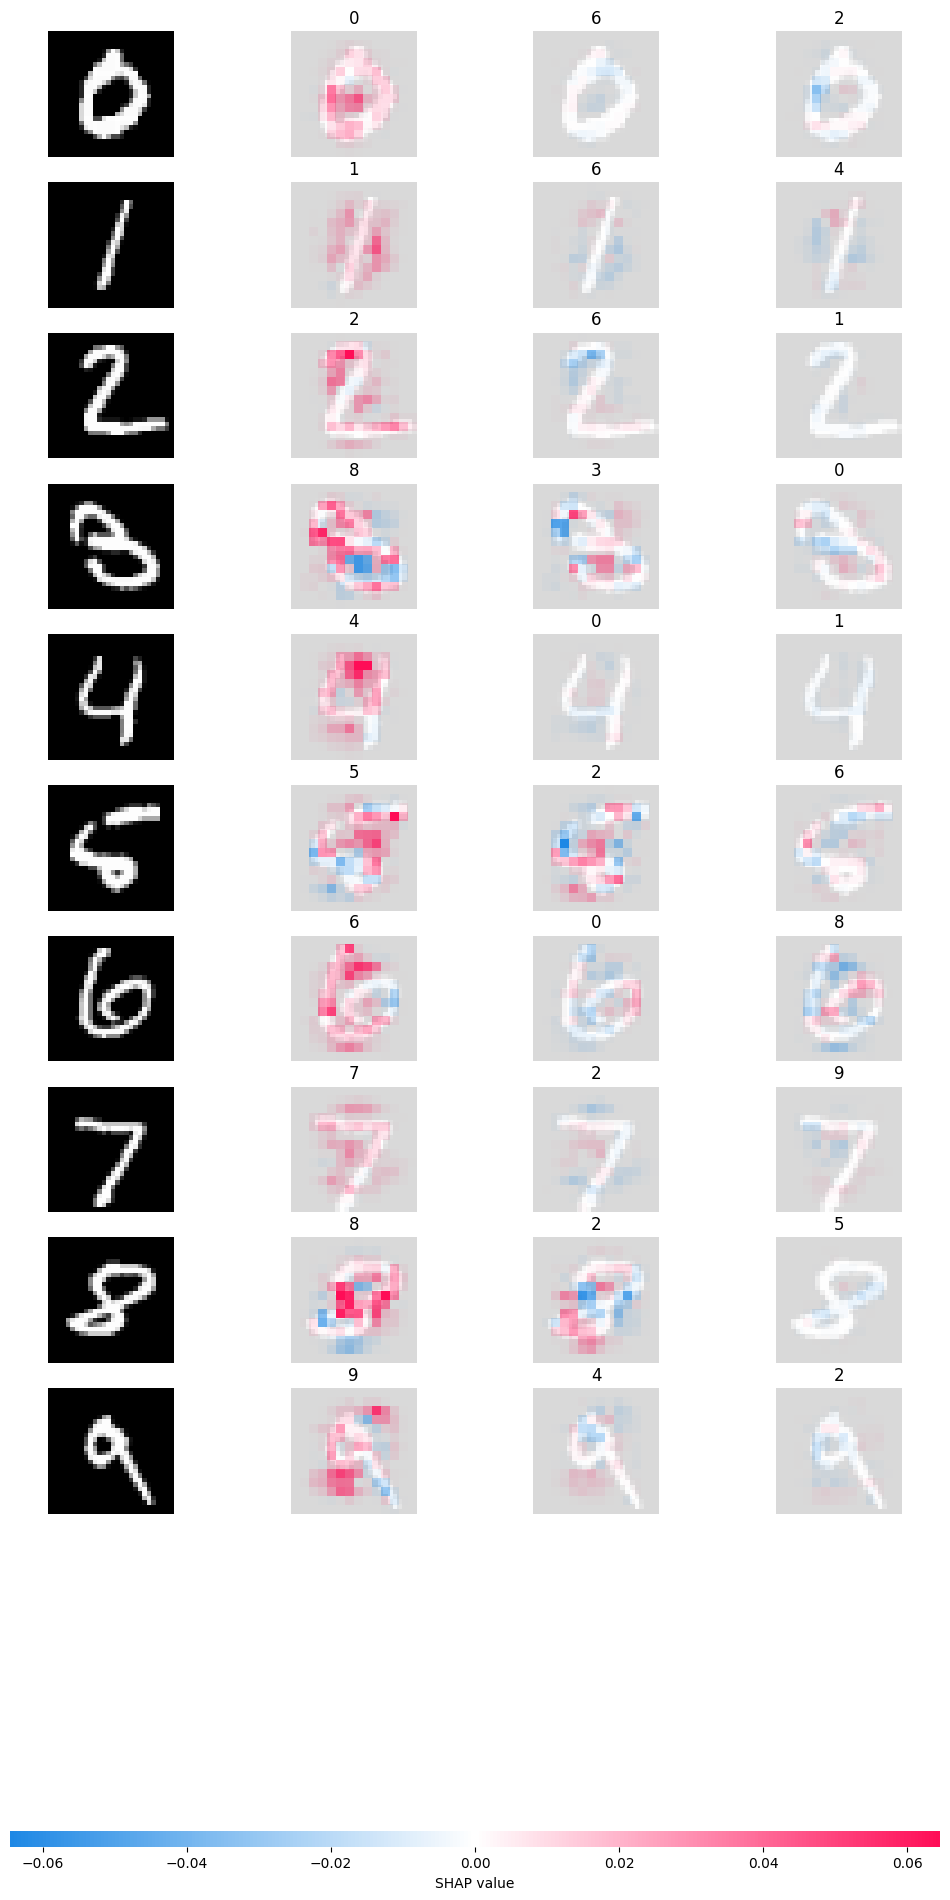

1/1 [==============================] - 0s 32ms/step


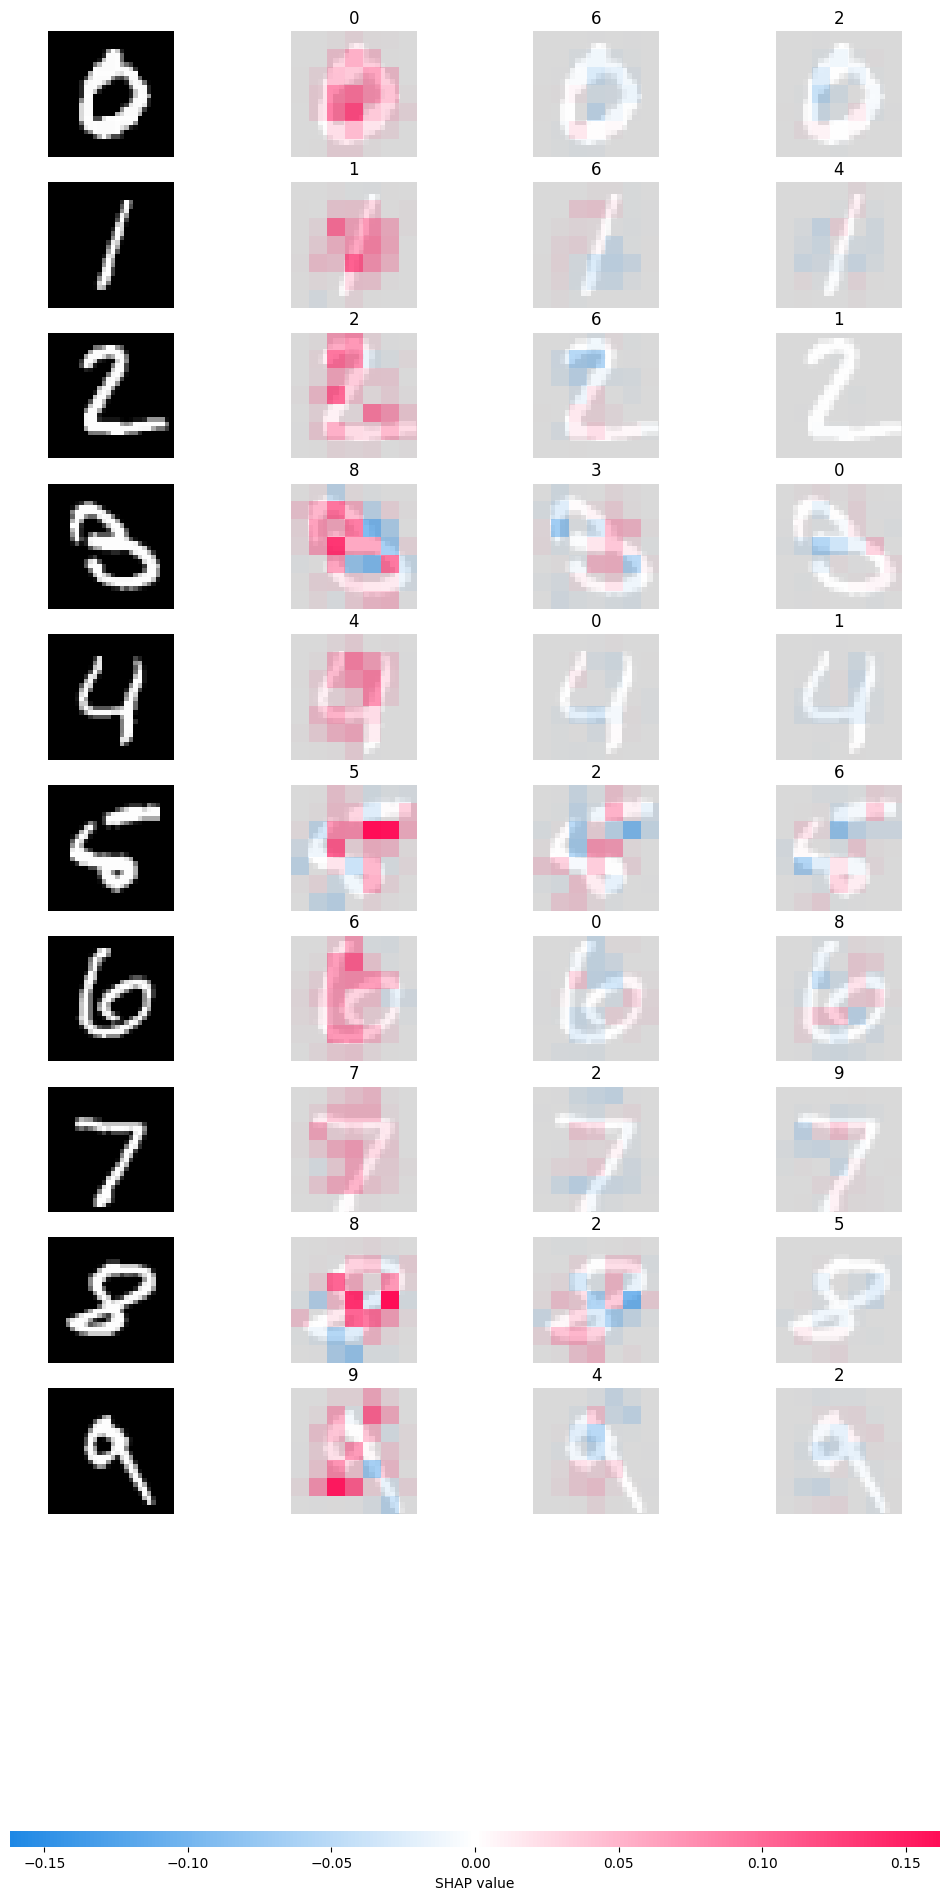

In [15]:
# Getting the indices of the conv layers in the model
conv_layer_indices = [i for i, layer in enumerate(model.layers) if "conv" in layer.name]

for layer_index in conv_layer_indices:
    # Creating a model that would produce inputs of necessary shape
    model_input = Model(inputs=model.layers[0].input,
                        outputs=model.layers[layer_index - 1].output)

    # Creating a model that has the layer that we are interested in as input
    model_output = Model(inputs=model.layers[layer_index].input,
                         outputs=model.layers[-1].output)

    calculcate_plot_gradient_explainer(model_input=model_input,
                                       model_output=model_output,
                                       test_images=test_images,
                                       imgs_to_explain=imgs_to_explain)

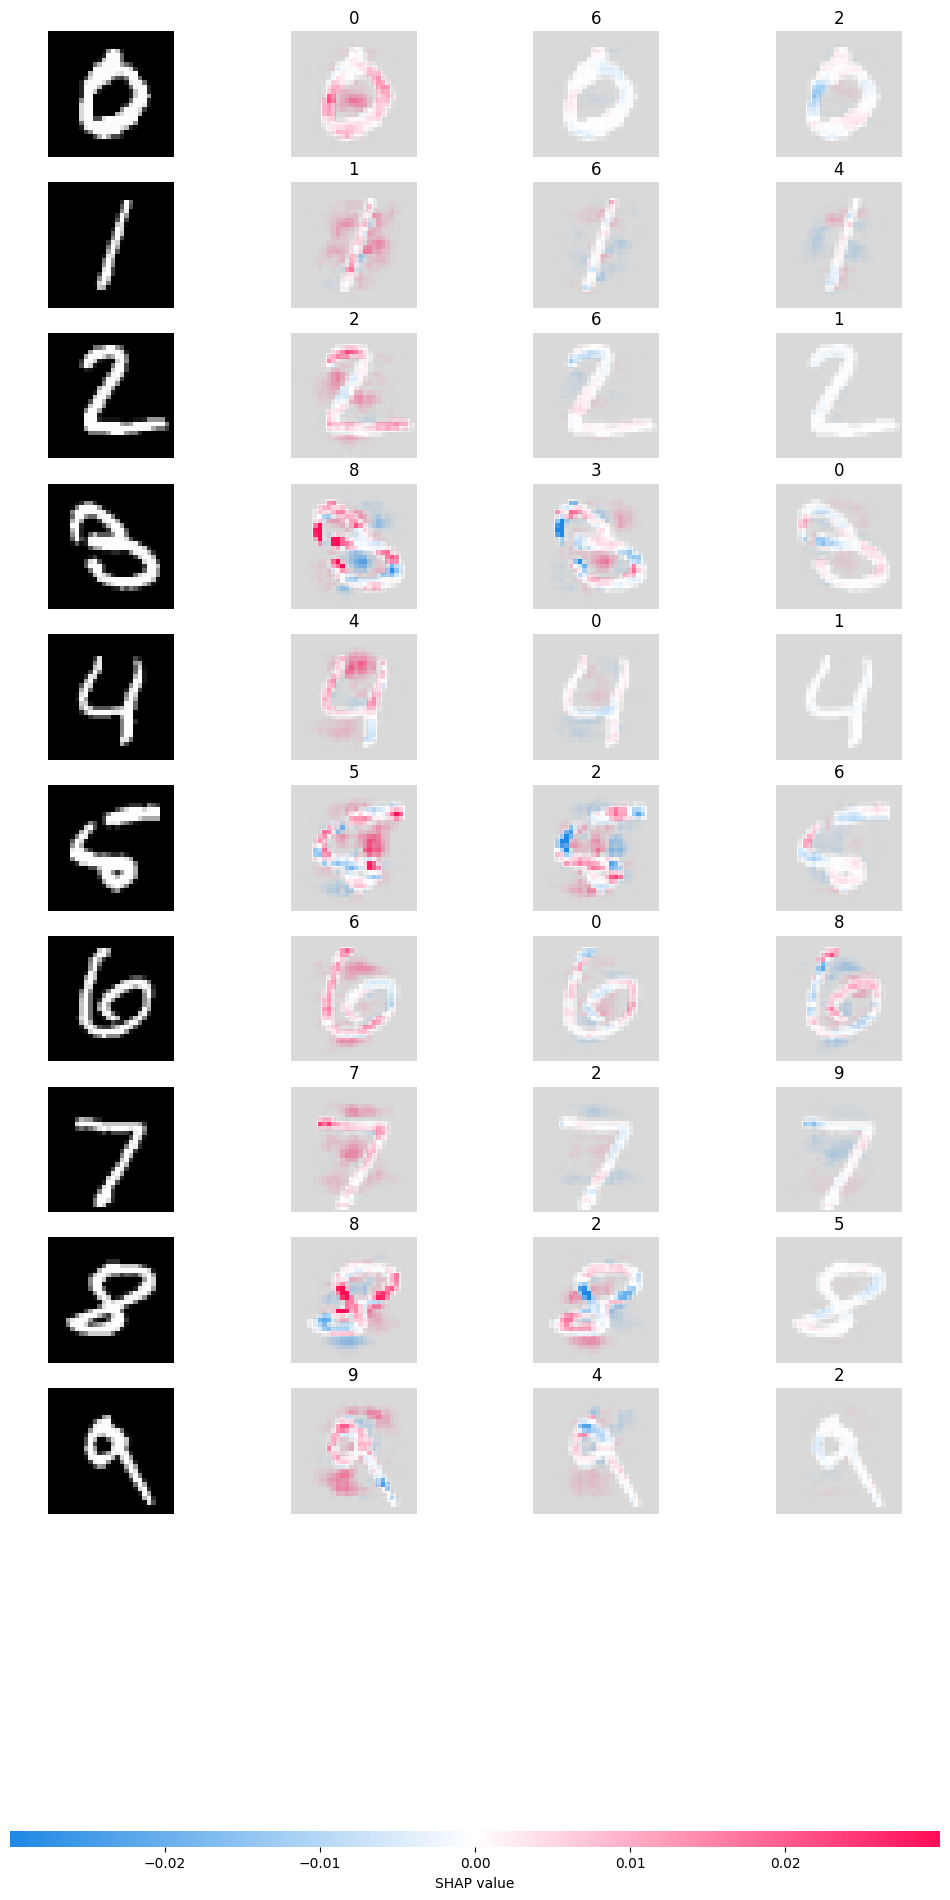

In [16]:
# Creating a GradientExplainer object
gradient_explainer = shap.GradientExplainer(model=model, data=test_images)

# Obtaining SHAP values and the indexes for model outputs 
shap_values, indexes = gradient_explainer.shap_values(imgs_to_explain,
                                                      ranked_outputs=3)

# Plotting SHAP values
shap.image_plot(shap_values=shap_values,
                pixel_values=imgs_to_explain,
                labels=indexes)

Deep Explainer

In [17]:
model_v1 = create_model()
model_v1.load_weights(filepath="model.h5")

In [20]:
# Picking background data for the Deep Explainer
data = test_images[7500:]

# Creating a DeepExplainer object
deep_explainer = shap.DeepExplainer(model=model_v1,
                                    data=data)

# Computing deep explainer values
shap_values = deep_explainer.shap_values(X=imgs_to_explain)

# Plotting SHAP values
shap.image_plot(shap_values=shap_values,
                pixel_values=imgs_to_explain,
                labels=indexes)

KeyboardInterrupt: ignored

In [24]:
!pip install innvestigate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.8 MB/s eta 0:00:00


In [21]:
model = tf.keras.models.load_model("model.h5")


In [28]:
sample_image = test_images[0:1]

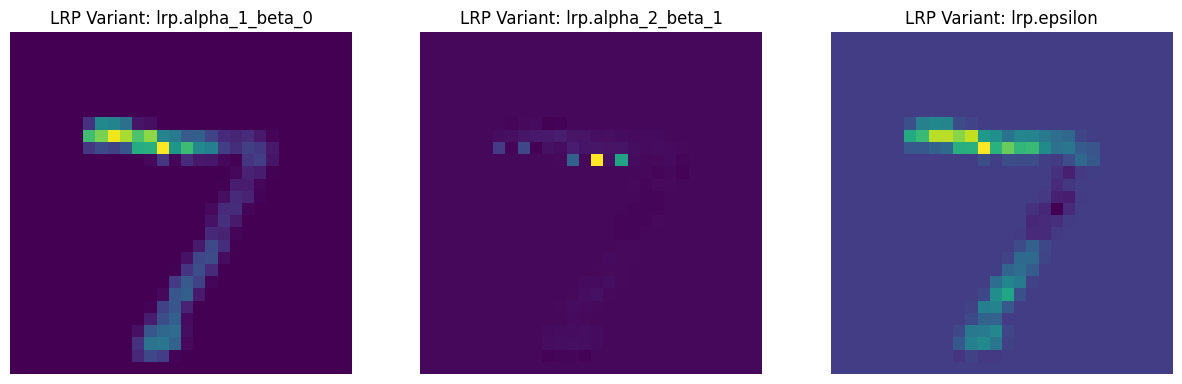

In [39]:

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import innvestigate
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.utils import to_categorical

# Disable eager execution
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Load your trained model
model = tf.keras.models.load_model("model.h5")

# Remove the softmax activation layer
model_without_softmax = Model(inputs=model.input, outputs=model.layers[-2].output)
lrp_variants = ["lrp.alpha_1_beta_0", "lrp.alpha_2_beta_1", "lrp.epsilon"]

# Create an analyzer for each LRP variant
lrp_analyzers = [innvestigate.create_analyzer(lrp_variant, model_without_softmax) for lrp_variant in lrp_variants]

# Choose an example image to analyze
image_to_analyze = test_images[0:1]

# Analyze the image with each LRP variant
analyses = [analyzer.analyze(image_to_analyze) for analyzer in lrp_analyzers]

# Visualize the analyses for comparison
plt.figure(figsize=(15, 5))
for i, (variant, analysis) in enumerate(zip(lrp_variants, analyses), 1):
    plt.subplot(1, len(lrp_variants), i)
    plt.imshow(np.squeeze(analysis), cmap="viridis")
    plt.title(f"LRP Variant: {variant}")
    plt.axis("off")

plt.show()